<Figure size 1800x1000 with 0 Axes>

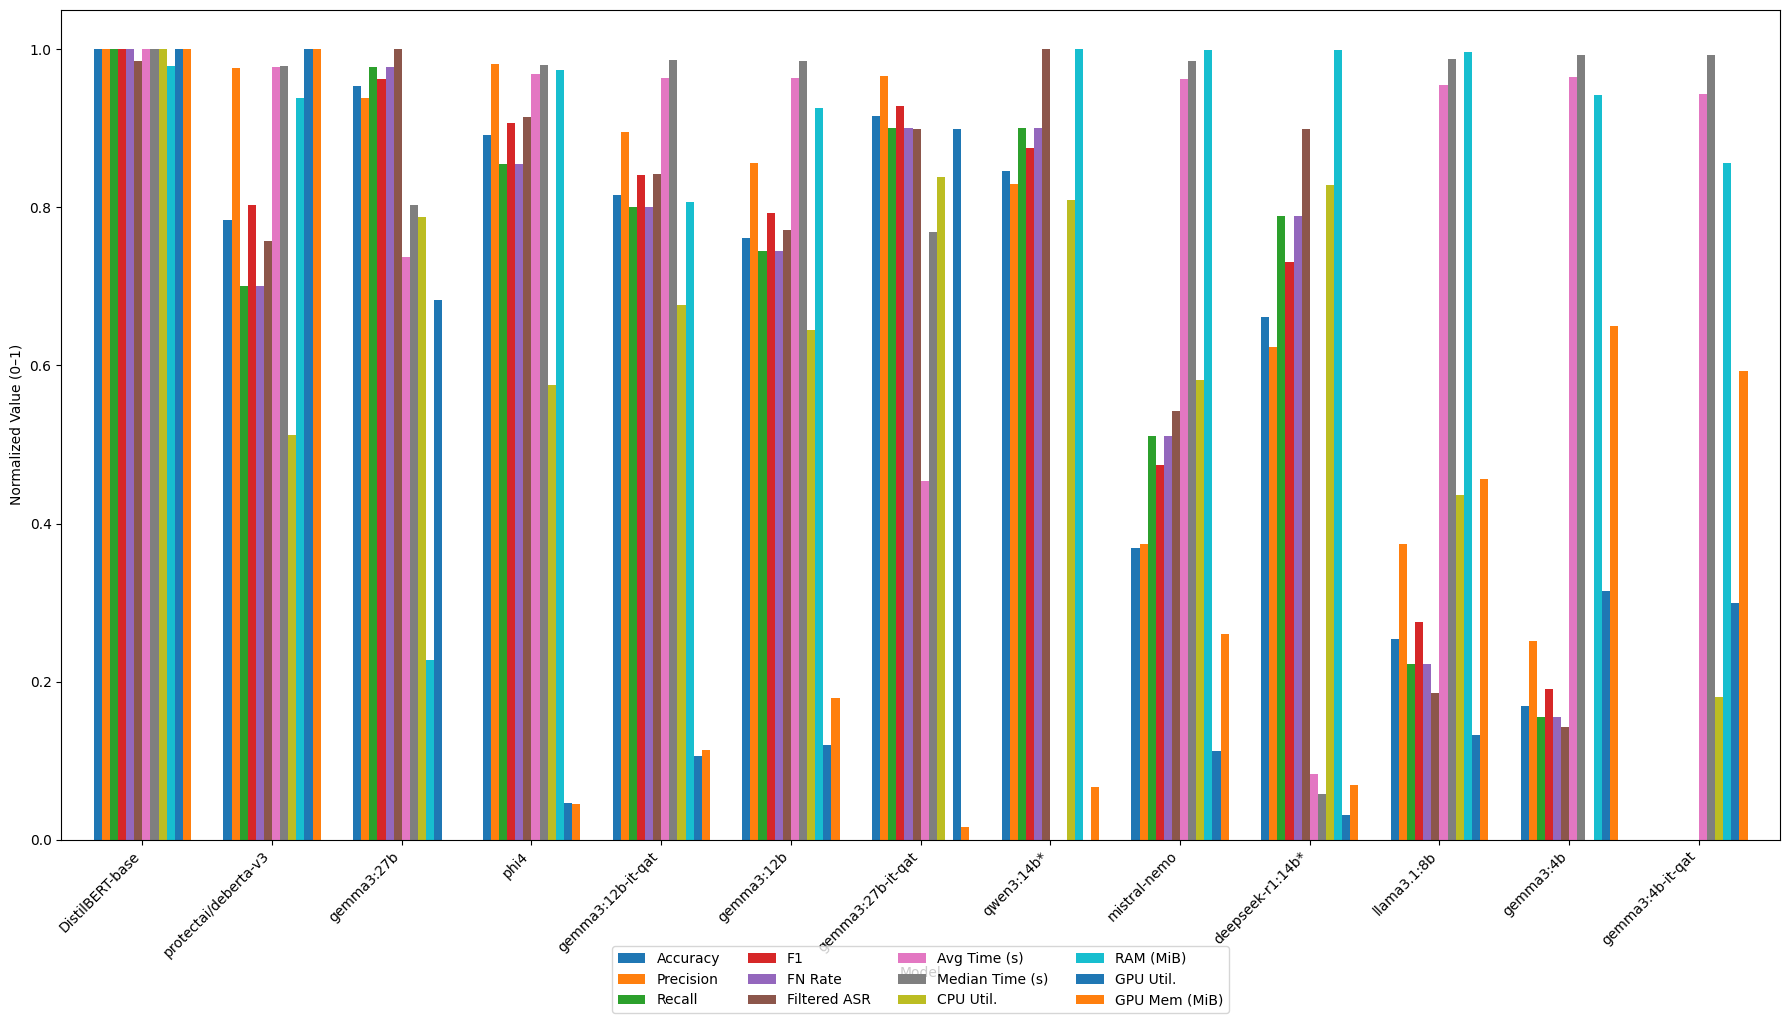

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Model": [
        "gemma3:4b", "gemma3:4b-it-qat", "gemma3:12b", "gemma3:12b-it-qat", "gemma3:27b", "gemma3:27b-it-qat",
        "deepseek-r1:14b*", "qwen3:14b*", "llama3.1:8b", "mistral-nemo", "phi4",
        "protectai/deberta-v3", "DistilBERT-base"
    ],
    "Accuracy": [57.25, 48.85, 86.64, 89.31, 96.18, 94.27, 81.68, 90.84, 61.45, 67.18, 93.13, 87.79, 98.47],
    "Precision": [64.52, 52.87, 92.62, 94.40, 96.40, 97.69, 81.82, 91.37, 70.21, 70.23, 98.40, 98.20, 99.27],
    "Recall": [43.17, 33.09, 81.29, 84.89, 96.40, 91.37, 84.17, 91.37, 47.48, 66.19, 88.49, 78.42, 97.84],
    "F1": [51.72, 40.71, 86.59, 89.39, 96.40, 94.42, 82.98, 91.37, 56.65, 68.15, 93.18, 87.20, 98.55],
    "FN Rate": [56.83, 66.91, 18.71, 15.11, 3.60, 8.63, 15.83, 8.63, 52.52, 33.81, 11.51, 21.58, 2.16],
    "Filtered ASR": [43.88, 51.08, 12.23, 8.63, 0.72, 5.76, 5.76, 0.72, 41.73, 23.74, 5.04, 12.95, 1.44],
    "Avg Time (s)": [0.9609, 1.4819, 0.9816, 0.9827, 6.4997, 13.3554, 22.3502, 24.3752, 1.2148, 1.0212, 0.8709, 0.6496, 0.1181],
    "Median Time (s)": [0.2809, 0.2937, 0.4553, 0.4325, 4.6557, 5.4516, 21.8899, 23.2103, 0.4110, 0.4611, 0.5803, 0.6186, 0.1225],
    "CPU Util.": [74.53, 72.72, 68.04, 67.72, 66.60, 66.10, 66.19, 66.39, 70.14, 68.68, 68.74, 69.38, 64.47],
    "RAM (MiB)": [2383.29, 3255.30, 2548.18, 3764.40, 9695.13, 12024.74, 1803.04, 1790.90, 1822.54, 1796.43, 2059.87, 2414.97, 1998.52],
    "GPU Util.": [66.55, 68.03, 85.48, 86.81, 30.84, 9.83, 94.10, 97.13, 84.34, 86.22, 92.66, 0.00, 0.00],
    "GPU Mem (MiB)": [4250.86, 4894.92, 9602.93, 10353.09, 11644.22, 11462.27, 10863.32, 10881.28, 6452.26, 8684.27, 11139.06, 265, 265]
}

# Create DataFrame
df = pd.DataFrame(data)

# Normalize all metrics to 0–1 scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = df.copy()

# Metrics where lower is better — invert after scaling
lower_is_better = ["FN Rate", "Filtered ASR", "Avg Time (s)", "Median Time (s)", "CPU Util.", "RAM (MiB)", "GPU Util.", "GPU Mem (MiB)"]
for col in df.columns[1:]:
    if col in lower_is_better:
        df_norm[col] = 1 - scaler.fit_transform(df[[col]])
    else:
        df_norm[col] = scaler.fit_transform(df[[col]])

# Sort models by average normalized score
df_norm["Score"] = df_norm.drop(columns=["Model"]).mean(axis=1)
df_sorted = df_norm.sort_values(by="Score", ascending=False).drop(columns="Score")

# Plot all metrics as normalized bars
plt.figure(figsize=(18, 10))
df_sorted.set_index("Model").plot(kind="bar", width=0.75, figsize=(18, 10))

# plt.title("Normalized Metric Comparison Across Models (0–1 scale, higher is better)", fontsize=16)
plt.ylabel("Normalized Value (0–1)")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)
plt.show()
